# BASIC STATISTICS

In [2]:
# Import necessary libraries
import numpy as np 
import pandas as pd 

# This command installs the pandas library, which is used for data manipulation and analysis in Python.
import matplotlib.pyplot as plt
# Importing the pyplot module from the matplotlib library for creating visualizations
import seaborn as sns
# Importing the seaborn library, which is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics
# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('expand_frame_repr', False)

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")


In [3]:
# Importing the pandas library, which is used for data manipulation and analysis
import pandas as pd

# Loading a DataFrame from a CSV file
# 'data.csv' should be replaced with the path to your actual CSV file
df = pd.read_csv('sales_data_with_discounts.csv')

# Displaying the first few rows of the DataFrame to verify that it was loaded correctly
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
#Identify Numerical Columns:

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [5]:
#Calculate Basic Statistical Measures:
#Compute the mean, median, mode, and standard deviation for each numerical column
mean_values = df[numerical_cols].mean()
median_values = df[numerical_cols].median()
mode_values = df[numerical_cols].mode().iloc[0]
std_dev_values = df[numerical_cols].std()

print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Mode:\n", mode_values)
print("Standard Deviation:\n", std_dev_values)

Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


Interpretation:

1) Mean provides the average value.

2) Median shows the middle value when data is sorted.

3) Mode indicates the most frequent value.

4) Standard Deviation measures data spread. High values indicate more variability, while low values suggest data points are closer to the mean.

# Data Visualization

## Histogram

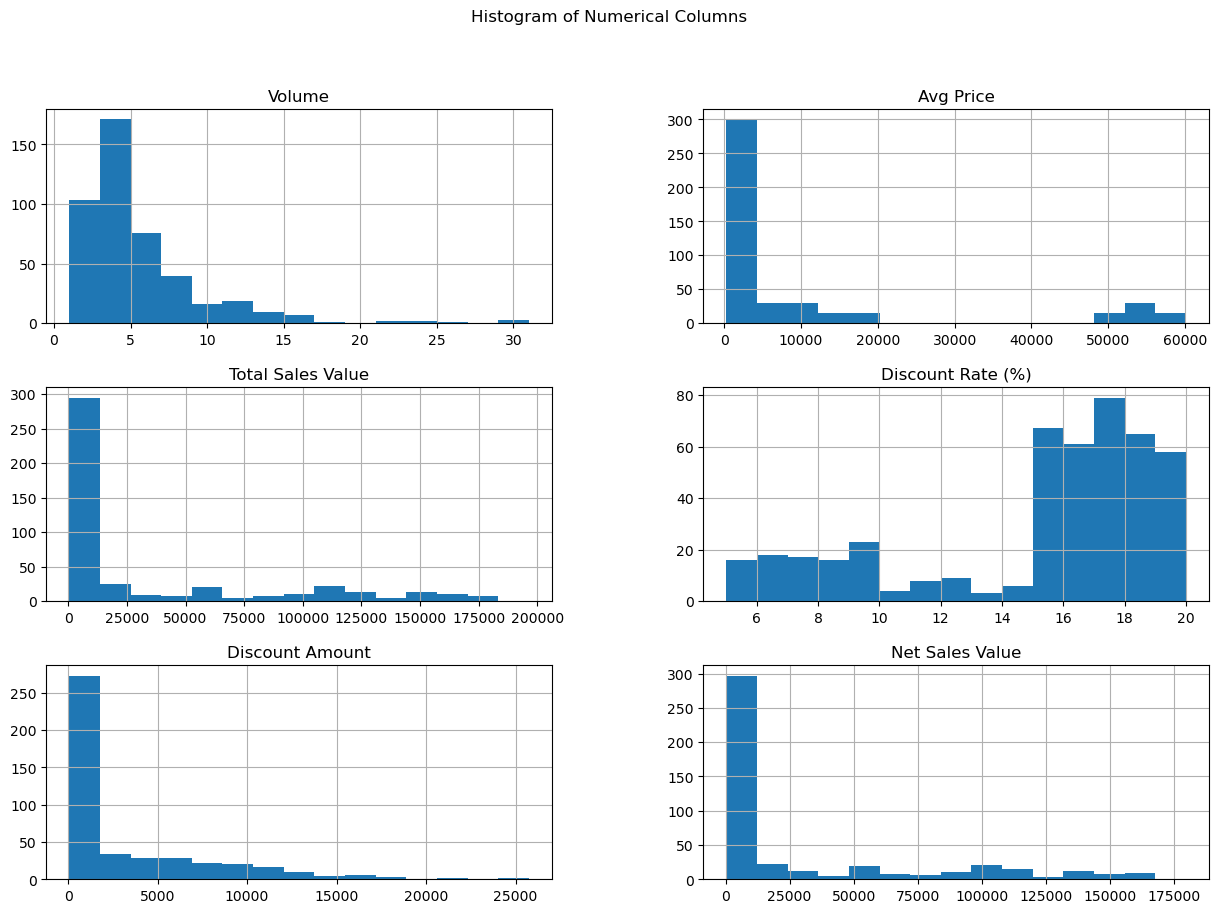

In [6]:
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histogram of Numerical Columns")
plt.show()

Interpretation:

      1) Skewness indicates whether data is symmetrically distributed.

      2) Outliers are extreme values that differ significantly from the majority of data.


## Boxplot

<Figure size 1500x1000 with 0 Axes>

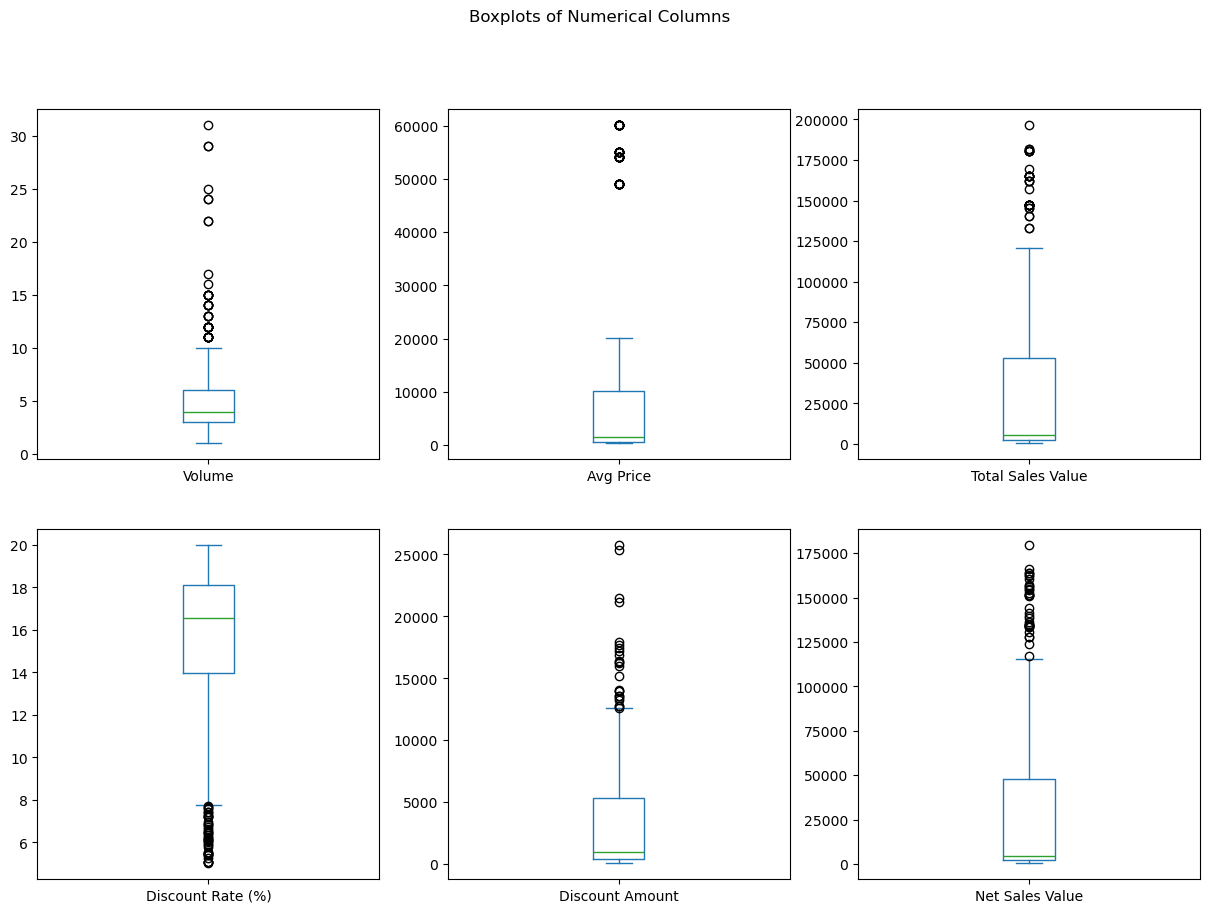

In [7]:
plt.figure(figsize=(15, 10))
df[numerical_cols].plot(kind= 'box', subplots=True, layout=(2,3), figsize=(15, 10))
plt.suptitle('Boxplots of Numerical Columns')
plt.show()

### Bar Chart Analysis for Categorical Columns:

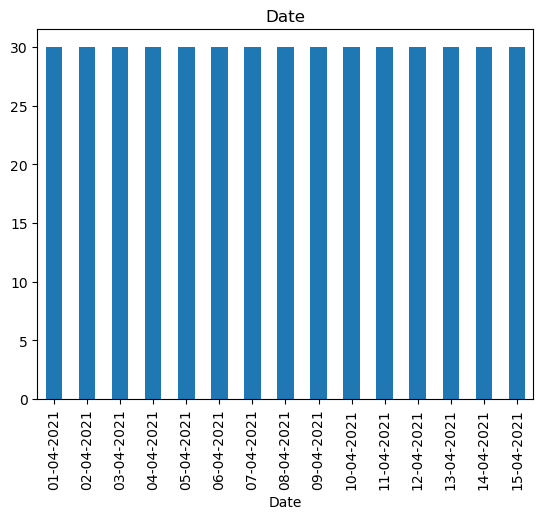

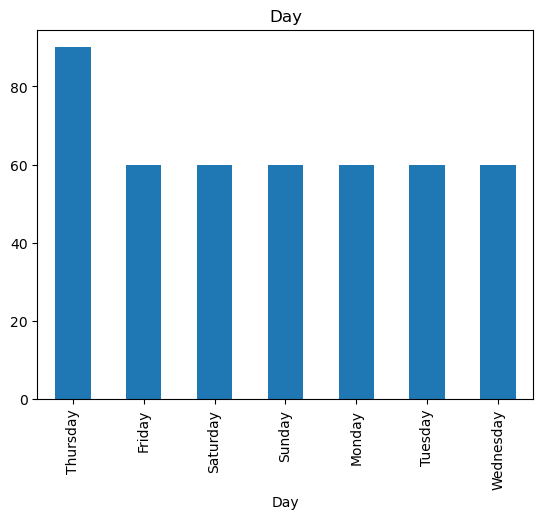

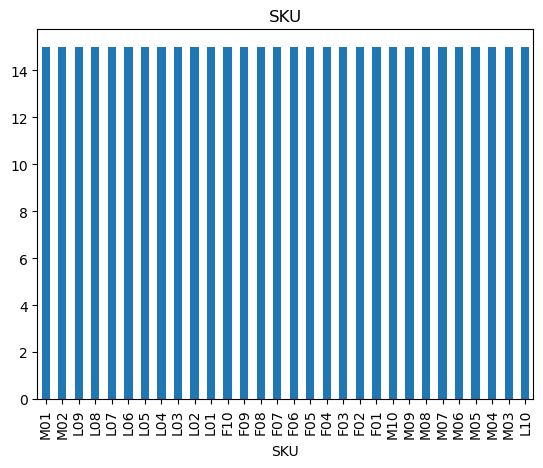

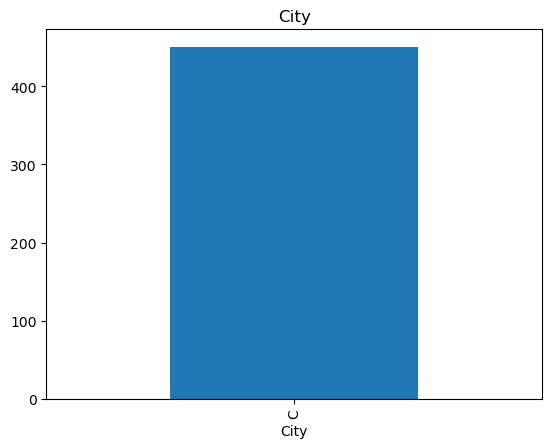

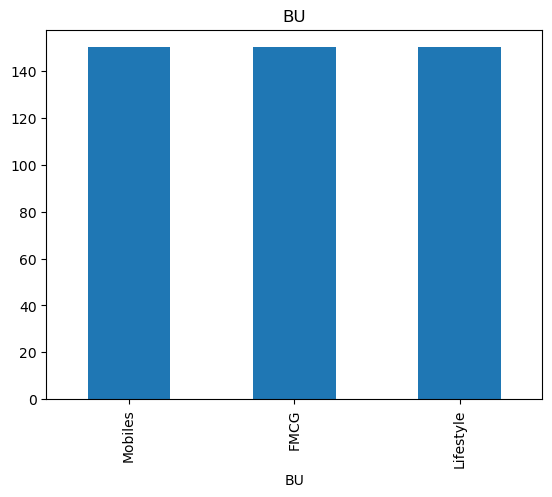

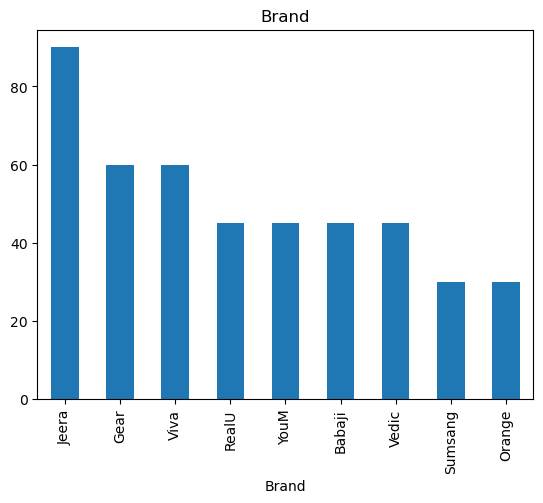

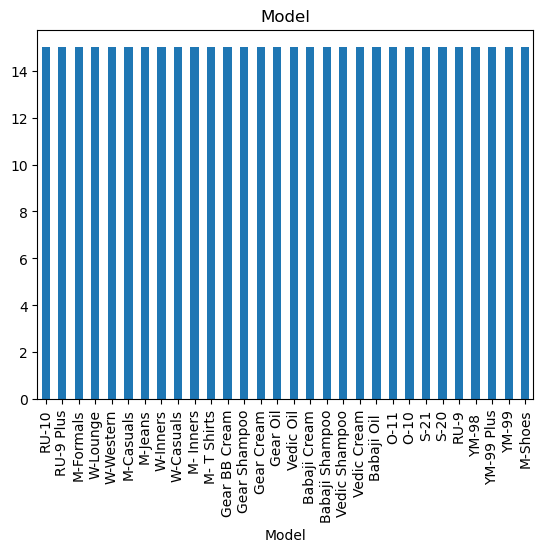

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

# Standardization of Numerical Variables

Standardization (z-score normalization) transforms data so that it has a mean of 0 and a standard deviation of 1. The formula is: z = x-μ/σ

Where:

*   x is the value of a data point,
*   μ is the mean, and

*   σ is the standard deviation

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

### Compare Before and After:
    # Plot histograms before and after standardization to observe the effect.

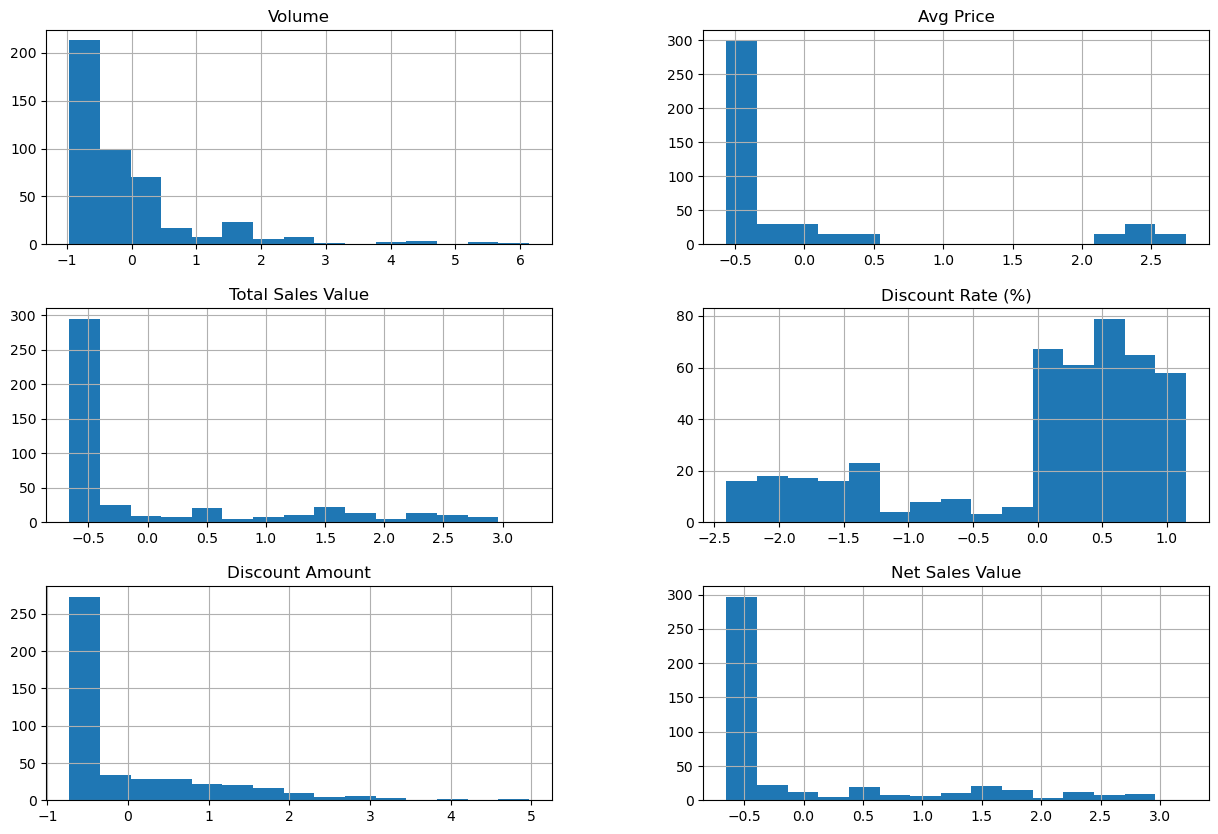

In [10]:
import matplotlib.pyplot as plt

data_standardized.hist(bins=15, figsize=(15, 10))
plt.show()

## Conversion of Categorical Data into Dummy Variables

In [11]:
#Apply One-hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,Date_11-04-2021,Date_12-04-2021,Date_13-04-2021,Date_14-04-2021,Date_15-04-2021,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,SKU_F01,SKU_F02,SKU_F03,SKU_F04,SKU_F05,SKU_F06,SKU_F07,SKU_F08,SKU_F09,SKU_F10,SKU_L01,SKU_L02,SKU_L03,SKU_L04,SKU_L05,SKU_L06,SKU_L07,SKU_L08,SKU_L09,SKU_L10,SKU_M01,SKU_M02,SKU_M03,SKU_M04,SKU_M05,SKU_M06,SKU_M07,SKU_M08,SKU_M09,SKU_M10,City_C,BU_FMCG,BU_Lifestyle,BU_Mobiles,Brand_Babaji,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM,Model_Babaji Cream,Model_Babaji Oil,Model_Babaji Shampoo,Model_Gear BB Cream,Model_Gear Cream,Model_Gear Oil,Model_Gear Shampoo,Model_M- Inners,Model_M- T Shirts,Model_M-Casuals,Model_M-Formals,Model_M-Jeans,Model_M-Shoes,Model_O-10,Model_O-11,Model_RU-10,Model_RU-9,Model_RU-9 Plus,Model_S-20,Model_S-21,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

## Conclusion

*   Descriptive Statistics: Key metrics such as mean, median, and standard deviation provide insight into the central tendency and variability in the data. Skewed distributions indicate potential data transformation needs.
*   Data Visualization: Histograms reveal the shape of distributions, while boxplots help in identifying outliers. Categorical data analysis through bar charts shows category distributions

*   Standardization: Scaling the numerical data (using z-score normalization) is crucial for improving the performance of machine learning models, as it brings uniformity.
*   One-Hot Encoding: Categorical data must be transformed into dummy variables to ensure machine learning models can process them.